<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/mnist_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors Mnist

## Import


In [80]:
from tensorflow.keras.datasets import mnist
from sklearn import neighbors
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [81]:
## MNIST, 60K train img of hand writted numbers, 10K test img

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# We reduce dataset to avoid too much calculation time
x_train = train_images[:6000].reshape(6000, 784)
y_train = train_labels[:6000]

x_test = test_images.reshape(10000, 784)
y_test = test_labels

## Determine best neighbors number

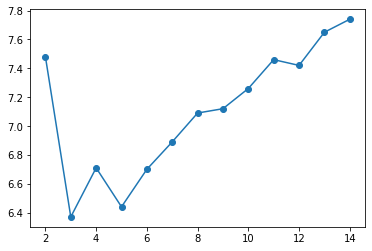

In [82]:
# Fit model with neighbors range from 2 to 14 and show error results

errors = []
for n_neighbors in range(2,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors)
    score = 1 - knn.fit(x_train, y_train).score(x_test, y_test)
    errors.append(score * 100)

plt.plot(range(2,15), errors, 'o-')
plt.show()

## Model

In [83]:
# This model should predict the class of a given img

model = neighbors.KNeighborsClassifier(n_neighbors=3) # 3 is the most effective

## Training

In [84]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Results

In [85]:
classification_errror = 1 - model.score(x_test, y_test)
print("Average classification error : ", classification_errror*100, "%")

Average classification error :  6.369999999999997 %


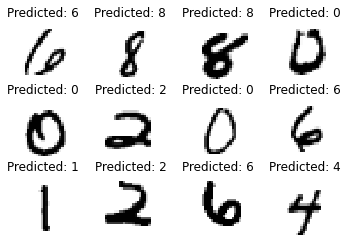

In [90]:
# On récupère les prédictions sur les données test
predicted = model.predict(x_test)

# On redimensionne les données sous forme d'images
images = x_test.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

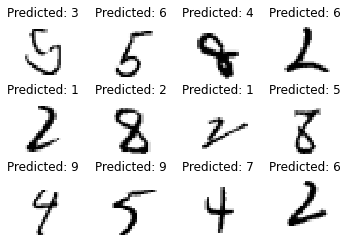

In [87]:
# on récupère les données mal prédites 
misclass = (y_test != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()